In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('tennis_stats.csv')

In [3]:
features = ['FirstServe', # % of first-serve attempts made
            'FirstServePointsWon', # % of first-serve attempt points won by the player
            'FirstServeReturnPointsWon', # % of opponents first-serve points the player was able to win
            'SecondServePointsWon', # % of second-serve attempt points won by the player
            'SecondServeReturnPointsWon', # % of opponents second-serve points the player was able to win
            'Aces', # number of serves by the player where the receiver does not touch the ball
            'BreakPointsConverted', # % of the time the player was able to win their opponent’s service game when they had the chance
            'BreakPointsFaced', # number of times where the receiver could have won service game of the player
            'BreakPointsOpportunities', # number of times where the player could have won the service game of the opponent
            'BreakPointsSaved', # % of the time the player was able to stop the receiver from winning service game when they had the chance
            'DoubleFaults', # number of times player missed both first and second serve attempts
            'ReturnGamesPlayed', # total number of games where the player’s opponent served
            'ReturnGamesWon', # total number of games where the player’s opponent served and the player won
            'ReturnPointsWon', # total number of points where the player’s opponent served and the player won
            'ServiceGamesPlayed', # total number of games where the player served
            'ServiceGamesWon', # total number of games where the player served and won
            'TotalPointsWon', # % of points won by the player
            'TotalServicePointsWon'] # % of points in games where the player served that they won
outcomes = ['Wins', # number of matches won in a year
            'Losses', # number of matches lost in a year
            'Winnings', # total winnings in USD($) in a year
            'Ranking'] # ranking at the end of year

offensive = ['Aces', 'DoubleFaults', 'FirstServe', 'FirstServePointsWon', 'SecondServePointsWon', 'BreakPointsFaced',\
             'BreakPointsSaved', 'ServiceGamesPlayed', 'ServiceGamesWon', 'TotalServicePointsWon']
defensive = ['FirstServeReturnPointsWon', 'SecondServeReturnPointsWon', 'BreakPointsOpportunities',\
            'BreakPointsConverted', 'ReturnGamesPlayed', 'ReturnGamesWon', 'ReturnPointsWon', 'TotalPointsWon']

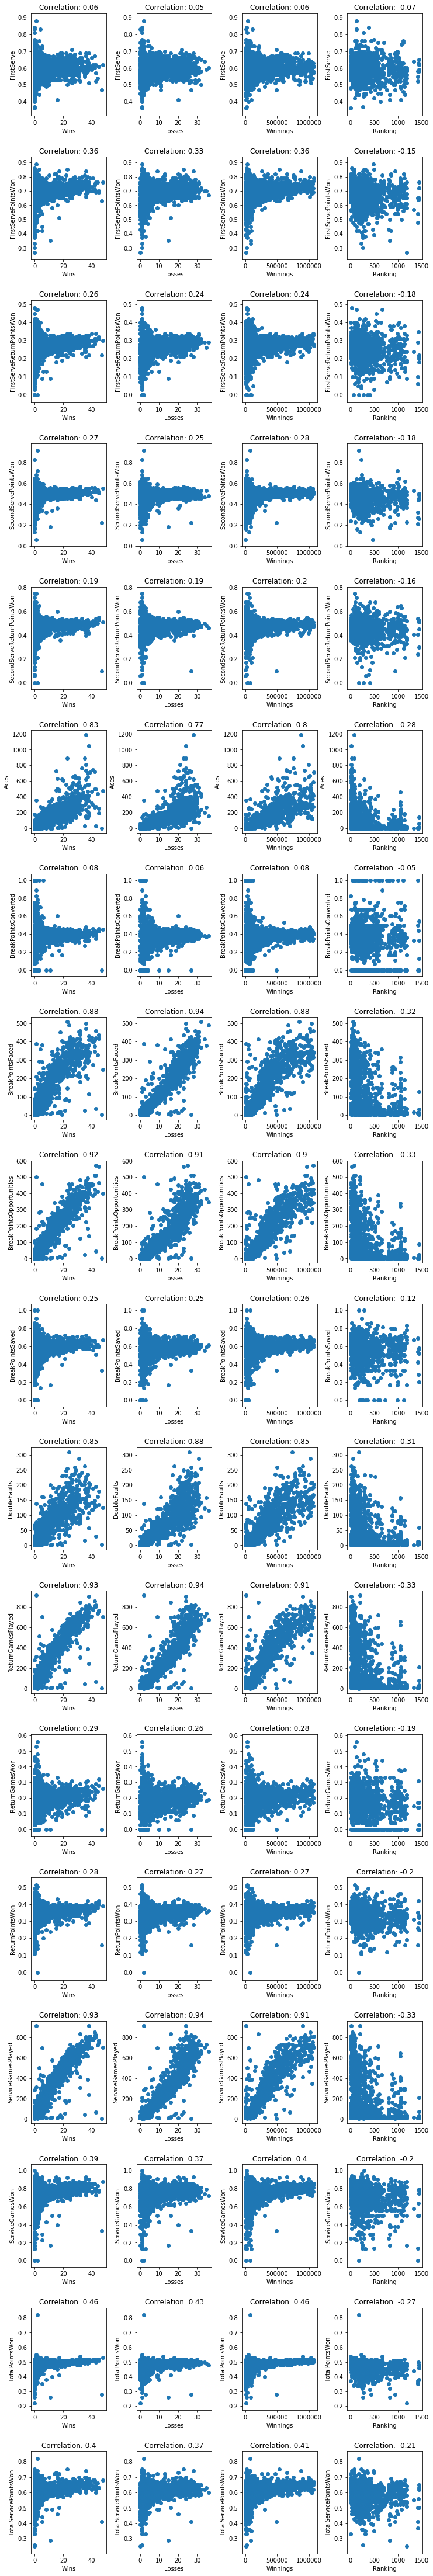

In [4]:
plt.figure(figsize=(12, 80))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for i in range(len(features)):
    for j in range(len(outcomes)):
        plt.subplot(len(features), len(outcomes), 1 + i*len(outcomes) + j)
        plt.scatter(df[outcomes[j]], df[features[i]])
        plt.xlabel(outcomes[j])
        plt.ylabel(features[i])
        plt.title(f'Correlation: {round(df[features[i]].corr(df[outcomes[j]]), 2)}')
plt.show()

In [5]:
def linear_regression(features, outcome):
    X = df[features]
    y = df[outcome]
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    print(f'Features: {features}')
    print(f'Outcome: {outcome}')
    print(f'Train Score: {reg.score(X_train, y_train)}')
    print(f'Test Score: {reg.score(X_test, y_test)}')
    print(f'Feature coefficients: {sorted(list(zip(features, reg.coef_)), key = lambda x: abs(x[1]), reverse=True)}')
    y_predicted = reg.predict(X_test)
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test, y_predicted)
    plt.xlabel(f'{outcome}')
    plt.ylabel(f'Predicted {outcome}')
    plt.show()

# Linear regression: one feature

Features: ['ServiceGamesPlayed']
Outcome: Winnings
Train Score: 0.840897433034283
Test Score: 0.8040898313870518
Feature coefficients: [('ServiceGamesPlayed', 1051.1907064949341)]


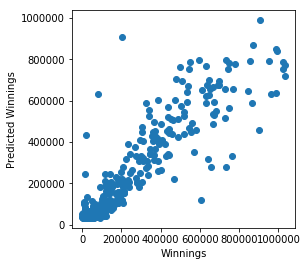

In [6]:
linear_regression(['ServiceGamesPlayed'], 'Winnings')

Features: ['BreakPointsOpportunities']
Outcome: Winnings
Train Score: 0.8186603337174662
Test Score: 0.7790768695631647
Feature coefficients: [('BreakPointsOpportunities', 1850.1168168699667)]


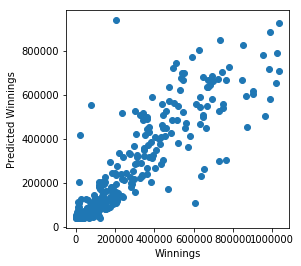

In [7]:
linear_regression(['BreakPointsOpportunities'], 'Winnings')

# Linear regression: two features

Features: ['ServiceGamesPlayed', 'ReturnGamesPlayed']
Outcome: Winnings
Train Score: 0.8409323982716942
Test Score: 0.8045167882641538
Feature coefficients: [('ServiceGamesPlayed', 1432.5293213809589), ('ReturnGamesPlayed', -381.15196087290752)]


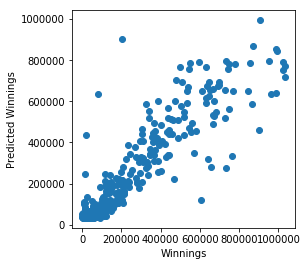

In [8]:
linear_regression(['ServiceGamesPlayed', 'ReturnGamesPlayed'], 'Winnings')

Features: ['ServiceGamesPlayed', 'BreakPointsOpportunities']
Outcome: Winnings
Train Score: 0.8420795582338332
Test Score: 0.8055953112285724
Feature coefficients: [('ServiceGamesPlayed', 861.65669758797821), ('BreakPointsOpportunities', 345.316259597748)]


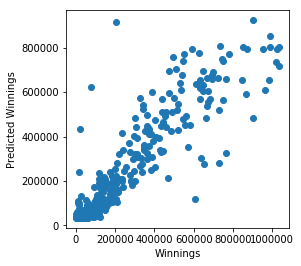

In [9]:
linear_regression(['ServiceGamesPlayed', 'BreakPointsOpportunities'], 'Winnings')

# Linear regression: multiple features

Features: ['FirstServe', 'FirstServePointsWon', 'FirstServeReturnPointsWon', 'SecondServePointsWon', 'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted', 'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved', 'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon', 'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon', 'TotalPointsWon', 'TotalServicePointsWon']
Outcome: Winnings
Train Score: 0.8484449500729737
Test Score: 0.8149220333672922
Feature coefficients: [('TotalServicePointsWon', -278867.33969898248), ('FirstServePointsWon', 204290.30057708337), ('TotalPointsWon', -173585.69800231606), ('SecondServePointsWon', 147073.26395423673), ('ReturnGamesWon', 82295.982523377927), ('FirstServeReturnPointsWon', -75425.804103984308), ('FirstServe', 46152.657405665479), ('BreakPointsSaved', 43302.731519526249), ('SecondServeReturnPointsWon', 8338.0676574006611), ('BreakPointsConverted', -3544.3859008732688), ('ServiceGamesWon', -3342.77681571422), ('BreakPointsFaced

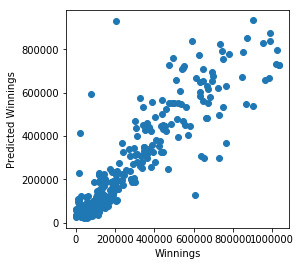

In [10]:
linear_regression(features, 'Winnings')

Features: ['Aces', 'DoubleFaults', 'FirstServe', 'FirstServePointsWon', 'SecondServePointsWon', 'BreakPointsFaced', 'BreakPointsSaved', 'ServiceGamesPlayed', 'ServiceGamesWon', 'TotalServicePointsWon']
Outcome: Winnings
Train Score: 0.8455321854253499
Test Score: 0.8096099680121255
Feature coefficients: [('TotalServicePointsWon', -282319.1539466572), ('FirstServePointsWon', 161502.39007060457), ('SecondServePointsWon', 118428.74725687206), ('BreakPointsSaved', 36205.98562938231), ('ServiceGamesWon', -18541.591564747148), ('FirstServe', 16395.06691913505), ('ServiceGamesPlayed', 1438.1765047036129), ('BreakPointsFaced', -813.22362321767821), ('DoubleFaults', 626.91944234048901), ('Aces', -206.22979307870619)]


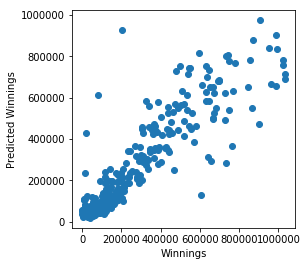

In [11]:
linear_regression(offensive, 'Winnings')

Features: ['FirstServeReturnPointsWon', 'SecondServeReturnPointsWon', 'BreakPointsOpportunities', 'BreakPointsConverted', 'ReturnGamesPlayed', 'ReturnGamesWon', 'ReturnPointsWon', 'TotalPointsWon']
Outcome: Winnings
Train Score: 0.8419755717111046
Test Score: 0.8050842850412694
Feature coefficients: [('TotalPointsWon', 112665.40843481189), ('ReturnPointsWon', -91273.058096317967), ('FirstServeReturnPointsWon', -82585.198893322144), ('ReturnGamesWon', 57038.816376475355), ('SecondServeReturnPointsWon', 11620.573581630277), ('BreakPointsConverted', -9421.0678579558371), ('ReturnGamesPlayed', 842.19449980088393), ('BreakPointsOpportunities', 371.80951156082119)]


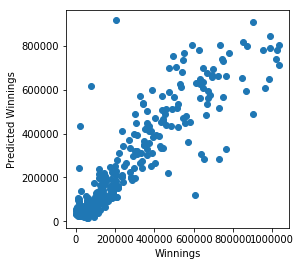

In [12]:
linear_regression(defensive, 'Winnings')